## Final Project Submission

Please fill out:
* Student name: **Chris Kamau,**
                **Kamande Karigi,**
                **Cynthia WANYEKI,**
                **Gichogu Macharia,**
                **Isaack Odera**
                
* Student pace:  **full time**
* Scheduled project review date/time: **23rd OCT 2023**
* Instructor name: **Diana Mongina**



**Stakeholder:** Real Estate Agency

**Business Problem:** Predicting the Impact of Home Renovations on Property Value

**Background:**
The real estate agency serves homeowners looking to buy and sell homes. For homeowners looking to sell their properties, understanding how specific home renovations might impact the estimated value of their homes is crucial. It can help homeowners make informed decisions on which renovations to prioritize to maximize their property's market value. Therefore, the business problem to address is predicting the impact of home renovations on property value accurately.

**OBJECTIVES**

1. To understand factors that affect the price of a house
2. To develop a model that can predict housing prices based on various features.
3. To make recommendations on how homeowners can optimize the selling price of a house


**Specifics of the Business Problem:**

***Home Renovation Recommendations:*** 

The real estate agency wants to provide homeowners with personalized recommendations on which home renovations are likely to increase the estimated value of their homes. These recommendations should be based on historical data and analysis.

***Estimation of Value Increase:*** 

Along with recommendations, homeowners need to know by what amount the estimated value of their homes is likely to increase as a result of specific renovations. This information is essential for homeowners to make informed decisions about renovation investments.

***Data-Driven Insights:*** 

The real estate agency aims to provide data-driven insights, rather than generic advice. Homeowners should receive tailored recommendations and estimates based on their property's characteristics, location, and the local real estate market conditions.

***Market Competitiveness:***

The agency wants to provide insights on how the recommended renovations will impact the competitiveness of the property in the local real estate market. For instance, will the renovation make the property more attractive compared to other listings in the area?

**Solution Approach:**

To address this business problem, the real estate agency can develop a predictive model that takes into account various features of a property (e.g., size, location, number of bedrooms, bathrooms, and current condition) along with information about potential renovations (e.g., kitchen remodel, bathroom upgrades, adding a bedroom) and estimates the increase in property value associated with each renovation.

The predictive model can be trained on historical real estate data with information about properties before and after renovations. This model will allow homeowners to input their property details and the renovations they are considering, and it will provide estimates of the expected value increase and market competitiveness.

The agency can also consider utilizing advanced techniques such as machine learning to improve the accuracy of predictions. Additionally, providing a range of potential value increases with associated confidence intervals can help homeowners make well-informed decisions.

By addressing this business problem, the real estate agency can offer a valuable service to homeowners, potentially attract more property listings, and establish itself as a trusted source for data-driven insights in the real estate market.

# 1. Importing Libraries

In [79]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, BayesianRidge, Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
import shap



# Display plots within the Jupyter Notebook (if using Jupyter Notebook)
%matplotlib inline

# Set the style of Seaborn plots to 'darkgrid'
sns.set_style('darkgrid')

# Set an option to display all columns in a DataFrame (no truncation)
pd.set_option('display.max_columns', None)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Data Import and Auditing
In this section, we will focus on the initial steps of a data analysis, which involve importing the data and conducting an audit or examination of the dataset. our aim at this stage is essential checking and ensuring on the data's quality, understanding its structure, and preparing it for subsequent analysis.

## 2.1 Data Import
**Data Loading from CSV File**

In this section, we are focused on importing the dataset, which is stored in a CSV (Comma-Separated Values) file named 'kc_house_data.csv.' 

In [2]:
df = pd.read_csv('data\kc_house_data.csv')

## 2.2 Data View and Data Describing
This section is dedicated to obtaining an initial overview of the imported dataset, examining its dimensions, viewing the first few rows, understanding the data types and summary statistics of the columns, and listing the column names.

In [3]:
# Dimension of DataFrame
innitial_shape = df.shape
innitial_shape

(21597, 21)

In [4]:
print("Our dataset has {num_columns} columns and {num_rows} rows".format(num_columns = df.shape[1],num_rows = df.shape[0]))

Our dataset has 21 columns and 21597 rows


In [5]:
# the number of Columns
for column in df.columns:
    print(column)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [6]:
# Data Viewing
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,Average,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,Average,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,Average,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [7]:
# Understanding Data - Total Entries, Number of Columns, Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Understanding Data and description 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


## 2.3 Data Quality
In this "Data Quality" section, our primary focus is to assess the overall quality and cleanliness of the dataset. This is a crucial step in data preprocessing, as it ensures that the dataset is suitable for analysis. We perform two key data quality checks:

***Checking for Missing Values***

***Duplicate Rows***

**df.nunique()**

These data quality assessments serve as foundational steps in data preprocessing, guaranteeing the reliability and integrity of the data as we proceed with our analysis.


In [9]:
# Checking for Missing vales
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# Check for the Duplicate Rows
df.duplicated().sum()

0

In [11]:
# Calculate the number of unique values for each column in the DataFrame 'df'.
# The result will provide the count of distinct values for each column.

df.nunique()


id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

## 2.4 Basic Modification of the Data and Data Definition 

In this section titled "Basic Modification of the Data and Data Definition," we perform initial data modifications and define the data structure for our analysis. Here's what we did:

***Date Conversion:***
***Id Column Removal:***
We dropped the 'id' column from the dataset because it doesn't have a direct relationship with the price and is sequentially generated with each entry. This column is essentially an identifier and doesn't provide meaningful information for our analysis. Removing it helps streamline the dataset and improve efficiency.

In [12]:
# Convert the 'date' column to datetime format, handling errors gracefully.
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [13]:
# Dropped id Columns  
df.drop(['id'],axis=1,inplace=True)

# 3. Exploratory Data Analysis 

In the section the analysis is conducted based on two broad categories: Categorical variables and Continuous data. Here's an explanation of this approach:

**Categorical Variables:**

Categorical variables are those that represent discrete categories or labels. During this exploratory data analysis, specific techniques and visualizations are applied to gain a better understanding of the distribution, relationships, and impact of these categorical variables on the target variable, which is the 'price' in this case.

**Continuous Data:**

Continuous data, on the other hand, consists of numeric values that can take any real number within a certain range.The analysis for continuous data involves various statistical measures, visualizations, and correlations to identify patterns, trends, and relationships between these continuous features and the target variable ('price'). Understanding how these numeric features affect the target variable is essential for building predictive models and making data-driven decisions.

In [14]:
categoricals = []  # List to store categorical columns
numerics = []     # List to store numeric columns

for column in df.columns:
    if df[column].dtype == 'object':
        categoricals.append(column)  # Append object-type columns to categoricals list
    else:
        numerics.append(column)  # Append numeric-type columns to numerics list

## 3.1 Categorical Variables
In this section the exploratory data analysis (EDA) primarily focuses on understanding and analyzing categorical variables. This section of the EDA process is crucial for gaining insights into the distribution and characteristics of categorical variables. It helps in understanding the data, identifying any data quality issues, and making informed decisions regarding further data preprocessing and analysis

### 3.1.1 Understand The Value_Counts

#### Check the value counts while detecting anomalies
The print_value_counts function is designed to provide a textual summary of the value counts for specified categorical columns in a Pandas DataFrame. Each summary includes the name of the column and the frequency of each category within that column. By providing this information, the function makes it easy to quickly grasp the distribution of categories within the dataset's categorical variables.

In [15]:
def print_value_counts(dataframe, columns):
    """
    Print the value counts, including NaN, for specified columns in a DataFrame.
    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - columns (list): A list of column names to display value counts for.
    """
    for column in columns:
        print(f"Value counts for '{column}':")
        
        # Calculate value counts, including NaN values
        value_counts = dataframe[column].value_counts(dropna=False)
        
        print(value_counts)
        print("\n\n")

In [16]:
# print value counts for categorical columns
print_value_counts(df, categoricals)

Value counts for 'waterfront':
NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64



Value counts for 'view':
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64



Value counts for 'condition':
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64



Value counts for 'grade':
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64



Value counts for 'sqft_basement':
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64





### 3.1.2 Handling Outliers and Missing Values

Upon reviewing the dataset, it became evident that the 'sqft_basement' column had been mistakenly categorized as categorical data primarily due to the presence of "?" values, which accounted for approximately 454 instances. To rectify this, we decided to address this issue by removing these questionable entries, as there was no reasonable explanation for their inclusion in the dataset, suggesting that they were erroneous or invalid inputs.

We identify outliers by selecting rows where the 'bedrooms' value is greater than or equal to 11. This filter isolates instances where the number of bedrooms in a house is significantly higher than the typical range found in the dataset. Addressing outliers is essential for data quality and statistical analysis, as extreme values can distort the overall patterns and insights derived from the data.

This data cleansing step aimed to ensure the accuracy and reliability of the data, ultimately leading to a more appropriate representation of the 'sqft_basement' column in the analysis or modeling process.

In [17]:
# Replace "?" with NaN in the 'sqft_basement' column
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)

# Converting the 'sqft_basement' to numeric so that we can categorize the columns under numerics
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Drop rows with NaN values in the 'sqft_basement' column
df.dropna(subset=['sqft_basement'], inplace=True)


# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)


<p>The issue at hand pertains to certain records in the dataset where the 'bedrooms' column contains values exceeding 10. Such instances are considered unrealistic, as they imply an exceptionally high number of bedrooms in a residential property, which may skew the results as well as our linear models and analysis derived from the data. To address this issue, it is more wise to drop the entire rows (or records) in the DataFrame where the 'bedrooms' value exceeds 10. By doing this, we eliminate these outliers from the dataset, ensuring that the analysis and modeling are based on more realistic and representative data points. This data cleaning step is crucial for maintaining data integrity and obtaining accurate insights from the dataset. </p>

In [18]:
# handling the Outliers in the bedroom column
# dropping these columns is wise as they may seem unrealistic and may interfere with our models.

df[df['bedrooms'] >= 11]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8575,2014-08-21,520000.0,11,3.00,3000,4960,2.0,NO,NONE,Average,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15518,2014-06-25,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [19]:

df = df[df['bedrooms'] <= 10]


The realization here is centered around the 'view' column, where the code calculates the number of missing values using the isna() function and then counts them using len(). The missing values in the 'view' column were identified, indicating that there were instances where no data was recorded for the view attribute. In response to this, the action taken was to remove (drop) the entire rows where the 'view' column had missing values using the dropna() function with the subset parameter specifying 'view'. This action ensures that the dataset is free of missing values in the 'view' column, maintaining data completeness for subsequent analysis and modeling.

In [20]:
# Calculate the number of missing values in the 'view' column
len(df[df['view'].isna()])

61

In [21]:
# Drop rows with missing values in the 'view' column
df = df.dropna(subset=['view'])

In [22]:
categoricals = []  # List to store categorical columns
numerics = []     # List to store numeric columns

for column in df.columns:
    if df[column].dtype == 'object':
        categoricals.append(column)  # Append object-type columns to categoricals list
    else:
        numerics.append(column)  # Append numeric-type columns to numerics list

## 3.2 Numerical Variables
In this section, the focus was on analyzing the continuous variables within the dataset. Continuous variables are numeric values that can take on a wide range of values. The analysis aimed to gain a deeper understanding of these variables.

### 3.2.1 Understand The Continuous Data
In this section, the goal was to understand and analyze the continuous data, which consists of numeric values that can take on a wide range of numerical values. To identify and address potential issues in the continuous variables, a set of operations was performed.

The purpose of this analysis was to identify columns with data quality issues and address them during the data preprocessing stage. By understanding the data quality, you can ensure that subsequent analyses are based on reliable and accurate information.


In [23]:
# Initialize a list to store columns with issues
columns_with_issues = []

for column_name in numerics:
    # Check if the column contains 0 or non-integer, non-float values
    if (df[column_name] == 0).any() or not pd.api.types.is_numeric_dtype(df[column_name]):
        columns_with_issues.append(column_name)

# Print the columns with issues
print("Columns with 0 or non-numeric values:")
for column_name in columns_with_issues:
    print(column_name)

Columns with 0 or non-numeric values:
date
sqft_basement
yr_renovated



The first issue pertains to the 'date' column, which is flagged as problematic because it contains date format data. Date format data can pose challenges in certain analyses, especially if not properly converted or handled. Depending on the specific analytical objectives, it may be necessary to engineer new features, such as year or month, or reformat it into a more suitable data type for analysis.

The second issue relates to the 'sqft_basement' column. It is noted as problematic because it contains the character "o," which is likely a typographical error or an invalid entry. Data quality is compromised when such inconsistencies are present in a numerical column, and they need to be addressed. To resolve this issue, the erroneous values may need to be corrected, removed, or treated in a way that aligns with the column's data type.

The third issue is with the 'yr_renovated' column, which contains 'nan' values. 'Nan' typically represents missing or undefined data in the context of data analysis. Missing values can impact the quality of analysis and modeling, and therefore, strategies like imputation (replacing missing values) or data handling need to be applied to address these missing values, ensuring that the column's data is complete and suitable for analysis.

#### 3.2.2 Handling Outliers and Missing Values

In [24]:
df[numerics].isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3742
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [25]:
# Check out the shape of the DataFrame after conducting EDA and data preprocessing
After_EDA_shape = df.shape

# Calculate the percentage of data lost
# Calculate the difference in the number of rows (data points) between initial and post-EDA shapes
# Calculate the relative percentage of data lost by dividing the difference by the sum of the initial and post-EDA shapes
lost_data = (innitial_shape[0] - After_EDA_shape[0]) / ((innitial_shape[0] + After_EDA_shape[0])) * 100

# Print the percentage of data lost
lost_data


1.2114253579211285

The code calculates the percentage of data lost after conducting exploratory data analysis (EDA) and making necessary data preprocessing changes.

The result, stored in the variable lost_data, represents the percentage of data that was removed or lost during EDA and data preprocessing. In your case, it appears that approximately 1.2114% of the data was lost. You've concluded that this loss is not significant and won't significantly impact the modeling process. This conclusion is often based on the understanding that the removed data points were outliers or contained missing or erroneous values that could adversely affect the analysis.

# 4 Feature Engineering

<p> This process invloves creating new faetures from preexisting data columns that may be important in our modelling.

The new column that shows the age of the house at the time of sale, and as we know, the age of the house can have a great impact on the price of the house. This column is obtained from the difference between the year of construction and the year of sale of the house. </p>

In [26]:
# Calculate the age of the properties
df['age'] = df['date'].dt.year - df['yr_built']

# - The minimum age of the house
# - The most old house
# - The average age of the houses

df['age'].agg({'min','max','mean'})

min      -1.000000
max     115.000000
mean     43.296063
Name: age, dtype: float64

In [27]:
# The minimum age is equal to -1, which has two cases, 
# either the house has been pre-sold or an error was made during the information registration.

df[df.age < 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
1731,2014-06-25,597326.0,4,4.00,3570,8250,2.0,NO,NONE,Average,10 Very Good,2860,710.0,2015,NaN,98040,47.5784,-122.226,2230,10000,-1
2637,2014-10-29,385195.0,1,1.00,710,6000,1.5,NO,NONE,Average,6 Low Average,710,0.0,2015,NaN,98144,47.5756,-122.316,1440,4800,-1
7374,2014-12-31,614285.0,5,2.75,2730,6401,2.0,NO,NONE,Average,8 Good,2730,0.0,2015,0.0,98072,47.7685,-122.160,2520,6126,-1
7875,2014-06-24,455000.0,2,1.50,1200,1259,2.0,NO,NONE,Average,8 Good,1000,200.0,2015,NaN,98144,47.6001,-122.298,1320,1852,-1
14181,2014-08-26,500000.0,2,2.25,1570,1269,2.0,NaN,NONE,Average,9 Better,1280,290.0,2015,NaN,98199,47.6514,-122.385,1570,6000,-1
16724,2014-06-17,350000.0,3,2.00,1380,3600,3.0,NaN,NONE,Average,8 Good,1380,0.0,2015,0.0,98122,47.6074,-122.305,1480,3600,-1
19373,2014-08-01,455000.0,3,1.75,1320,1014,3.0,NO,NONE,Average,9 Better,1320,0.0,2015,0.0,98122,47.6047,-122.305,1380,1495,-1
20322,2014-08-28,357000.0,5,2.50,2990,9240,2.0,NO,NONE,Average,8 Good,2990,0.0,2015,0.0,98133,47.7384,-122.348,1970,18110,-1
20403,2014-07-09,595000.0,4,3.25,3730,4560,2.0,NO,NONE,Average,9 Better,2760,970.0,2015,0.0,98103,47.6725,-122.330,1800,4560,-1
20509,2014-07-31,230000.0,3,1.50,1040,1264,2.0,NO,NONE,Average,9 Better,900,140.0,2015,0.0,98144,47.5951,-122.301,1350,3000,-1


In [28]:
# It is very likely that these data are noise, their number is much less than the total number of data, 
# which means that either this data was recorded incorrectly or that such an event is very rare.

df.drop(df[df.age < 0].index , inplace =True)
df.reset_index(inplace = True , drop =True)

In [29]:
# 95.84 The data in this column is equal to zero, which means two things: 
#     either the information about the last renovation is not available or the house has never been renovated. 
#     we delete this column because it does not give us useful information. But before doing this, 
#     we must also check the extent of its impact on the price of the house

(df.yr_renovated.value_counts(normalize = True)* 100).head()

0.0       95.840065
2014.0     0.398108
2003.0     0.178860
2013.0     0.178860
2007.0     0.173090
Name: yr_renovated, dtype: float64

correlation between yr_renovated and price is 0.12860692875274393


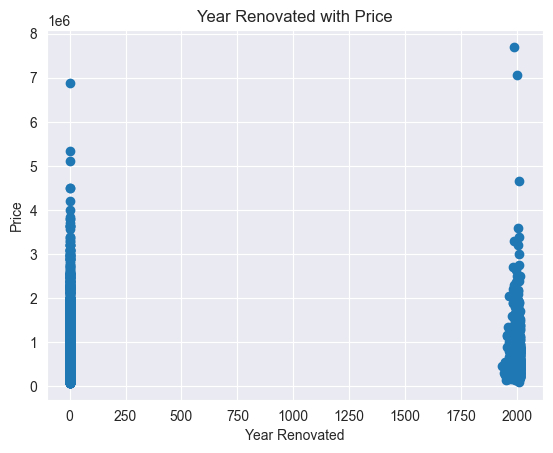

In [30]:
print("correlation between yr_renovated and price is {}".format(df['yr_renovated'].corr(df['price'])))
plt.scatter(x = df.yr_renovated ,y = df.price)
plt.title("Year Renovated with Price")
plt.xlabel("Year Renovated")
plt.ylabel("Price")
plt.show()

In [31]:
df.drop("yr_renovated",axis = 1 , inplace =True)

In [32]:

# Get unique zip codes
unique_zipcodes = df['zipcode'].unique()

# Create a dictionary to map zip codes to neighborhood labels
zipcode_to_neighborhood = {zipcode: f'Neighborhood_{i}' for i, zipcode in enumerate(unique_zipcodes)}

# Use a loop to assign neighborhood labels
df['neighborhood'] = df['zipcode'].map(zipcode_to_neighborhood)


In [33]:
# Calculate the count of 'YES' and 'NO' values in 'waterfront' by neighborhood
counts_by_neighborhood = df.groupby('neighborhood')['waterfront'].value_counts().unstack(fill_value=0)

# Determine the majority label for each neighborhood
majority_by_neighborhood = counts_by_neighborhood.idxmax(axis=1)

# Fill missing values in 'waterfront' based on the majority label for the neighborhood
for neighborhood, majority_label in majority_by_neighborhood.items():
    df.loc[(df['neighborhood'] == neighborhood) & df['waterfront'].isna(), 'waterfront'] = majority_label
    
    # Define a mapping dictionary for the 'condition' column
mapping = {
    'YES': 2,
    'NO': 1
}

# Use the mapping to transform the 'condition' column to numeric values
df['waterfront'] = df['waterfront'].map(mapping)


In [34]:
df['waterfront'].isnull().sum()

0

### 4.2 Mapping the label Features

In this section we conducted a series of mappings and transformations on several columns to make the data more suitable for modeling. These mappings and transformations were performed to make the data more amenable to modeling and to ensure that it accurately represents the factors that influence house prices. Each mapping was based on specific criteria and observations to reflect the underlying patterns in the data.


In [35]:
# Define the mapping for the 'view' column
view_mapping = {
    'NONE': 0,
    'AVERAGE': 2,
    'GOOD': 3,
    'FAIR': 1,
    'EXCELLENT': 4
}

# Map the 'view' column using the defined mapping
df['view'] = df['view'].map(view_mapping)

In [36]:
# Split the 'grade' column by space and use the first element
df['grade'] = df['grade'].str.split(' ').str[0]

# Convert the resulting values to integers
df['grade'] = df['grade'].astype(int)

In [37]:
# Define a mapping dictionary for the 'condition' column
condition_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}

# Use the mapping to transform the 'condition' column to numeric values
df['condition'] = df['condition'].map(condition_mapping)


In [38]:
df['yr_built'].isnull().sum()

0

In [39]:
# Create a mapper that extracts the integer from the 'neighborhood' column
mapper = lambda x: int(x.split('_')[1])

# Apply the mapper to the 'neighborhood' column
df['neighborhood'] = df['neighborhood'].apply(mapper)

## 4.3 Correlation Matrix and Multicollinearity Detection
In section we conducted an analysis to understand the relationships between the numerical features in our dataset, especially in relation to the target variable 'price.' we calculated and examined the correlation coefficients between the numerical features and the target variable 'price.' This allows us to understand which features have the strongest positive or negative correlation with the target variable, which is essential for feature selection and model building.

In [40]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age', 'neighborhood'],
      dtype='object')

the decision to drop the 'zipcode,' 'lat,' and 'long' columns after creating the 'neighborhood' feature is primarily driven by the goal of improving model performance, reducing redundancy, and enhancing the simplicity and interpretability of the dataset. It's a common practice in feature engineering to streamline the feature set and make it more suitable for the specific machine learning task at hand.


In [41]:
df = df.drop(['zipcode', 'lat', 'long'], axis=1)

df.shape

(21069, 18)

### Correlation

In [42]:
df.corr()['price'].sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_2684\1745294458.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.702164
grade            0.668353
sqft_above       0.605609
sqft_living15    0.586520
bathrooms        0.525149
view             0.397174
sqft_basement    0.322994
bedrooms         0.316469
waterfront       0.260780
floors           0.256964
sqft_lot         0.088376
sqft_lot15       0.083511
yr_built         0.055059
condition        0.034521
neighborhood     0.031299
age             -0.054986
Name: price, dtype: float64

### correlation matrix

C:\Users\user\AppData\Local\Temp\ipykernel_2684\1942736761.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


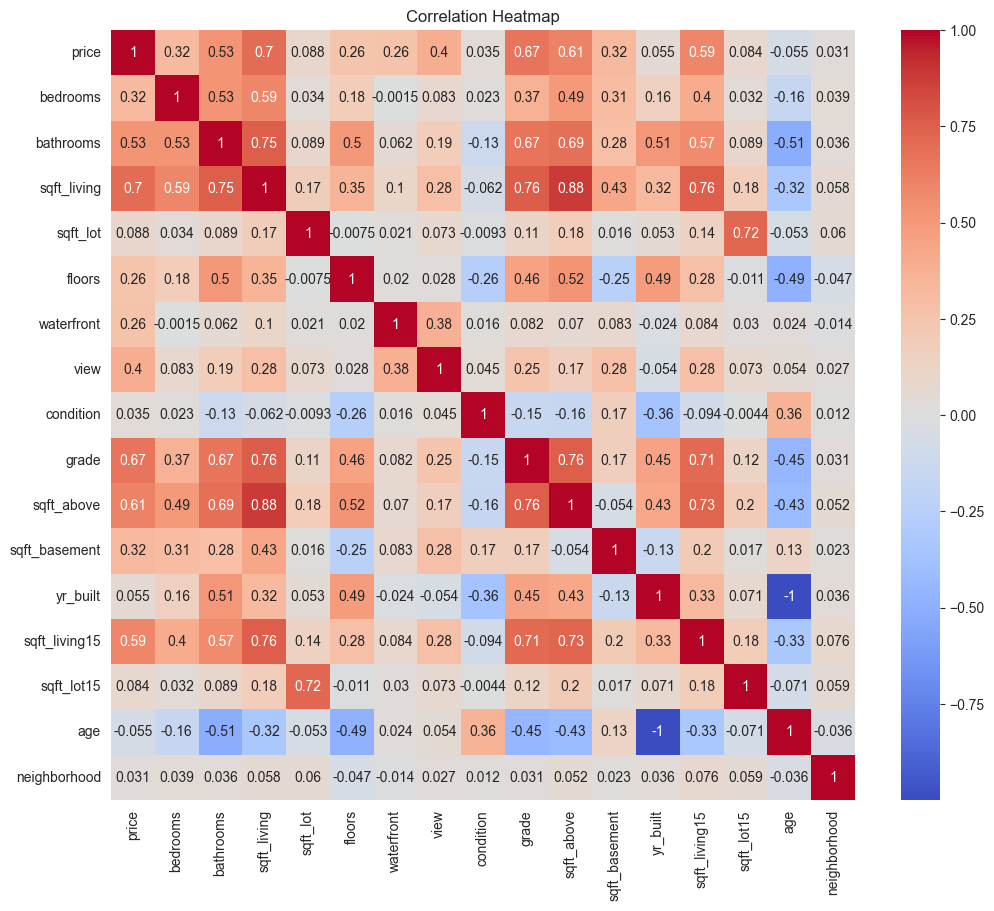

In [43]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Multicollinearity Detection
<p> Some features may be highly coreelated with each other and is therefore necessary to check for multicollinearity using the Variance Inflation Factor. </p>

In [44]:
# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove('price')  # Exclude the target variable

X = df[numeric_columns]  # Use only numeric columns for VIF calculation

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
vif 

,Feature,VIF
0,bedrooms,25.507867
1,bathrooms,28.446763
2,sqft_living,inf
3,sqft_lot,2.375485
4,floors,16.873170
5,waterfront,180.345169
6,view,1.504885
7,condition,33.787802
8,grade,141.658883
9,sqft_above,inf



The table the Variance Inflation Factor (VIF) values for various features in your dataset. Multicollinearity can make it difficult to interpret the individual impact of each variable on the dependent variable and can lead to unstable and unreliable regression coefficients. 

 it's clear that "sqft_living," "sqft_above," and "sqft_basement" have extremely high VIF values (infinity), which indicates perfect multicollinearity. This means that these variables are linear combinations of each other, and they provide the same information. thus we considered removing "sqft_above," and "sqft_basement" variables to address multicollinearity.



In [46]:
df1 = df.copy()

df1.drop(["sqft_above", "sqft_basement"], axis=1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,sqft_living15,sqft_lot15,age,neighborhood
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1,0,3,7,1955,1340,5650,59,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,1,0,3,7,1951,1690,7639,63,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,1,0,3,6,1933,2720,8062,82,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,1,0,5,7,1965,1360,5000,49,3
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1,0,3,8,1987,1800,7503,28,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21064,2014-05-21,360000.0,3,2.50,1530,1131,3.0,1,0,3,8,2009,1530,1509,5,13
21065,2015-02-23,400000.0,4,2.50,2310,5813,2.0,1,0,3,8,2014,1830,7200,1,6
21066,2014-06-23,402101.0,2,0.75,1020,1350,2.0,1,0,3,7,2009,1020,2007,5,37
21067,2015-01-16,400000.0,3,2.50,1600,2388,2.0,1,0,3,8,2004,1410,1287,11,23


# 5 Univariate Analysis And Bi-variate Analysis

In [47]:
columns = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'age',
       'neighborhood']

## 5.1  Univariate Analysis
<p> Involves checking how data is distributed. </p>

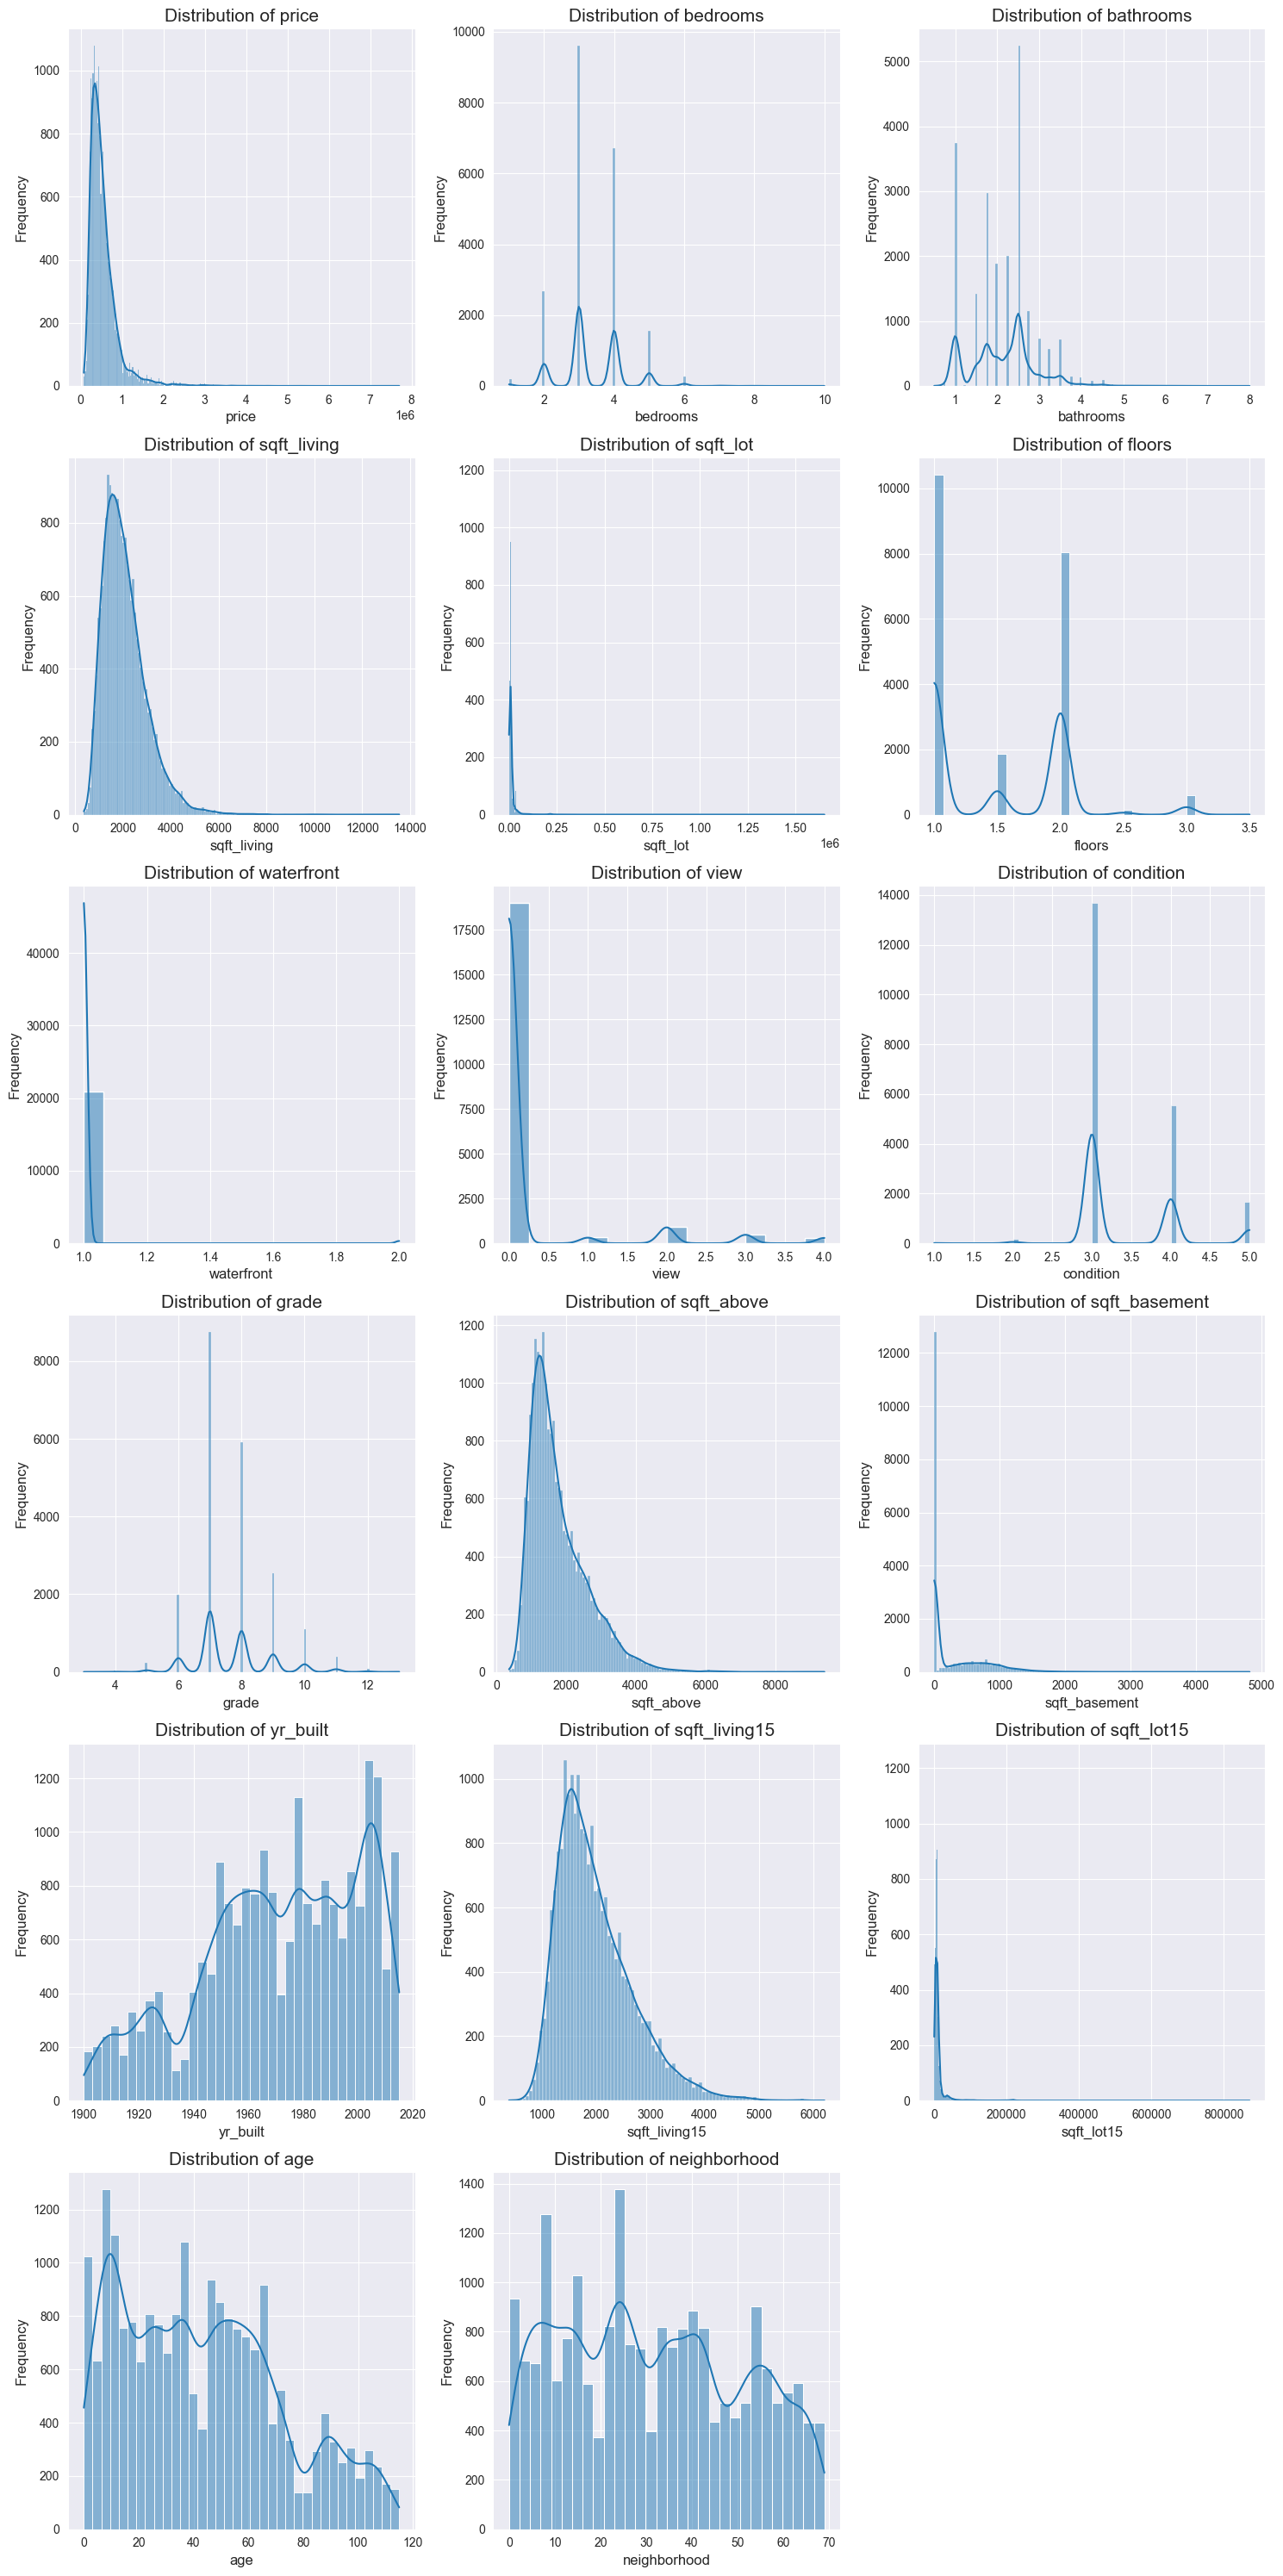

In [48]:
def plot_all_distributions(df1):
    # Get the list of numeric column names
    numeric_columns = df.select_dtypes(include='number').columns

    # Calculate the number of rows and columns for subplots
    num_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)
    num_cols = 3

    # Set the figure size based on the number of subplots
    plt.figure(figsize=(15, 5 * num_rows))

    # Loop through each numeric column and create a subplot
    for i, column_name in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[column_name], kde=True)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.title(f'Distribution of {column_name}', fontsize=15)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()
    
plot_all_distributions(df1)

### Bi-variate Analysis

In [49]:
# sns.pairplot(df1)
# plt.show()

# 6 Multivariate Analysis
In the section on Multivariate Analysis, scatterplots were created to explore the relationships between multiple variables. 
These scatterplots allow for the visual exploration of relationships between price, and other relevant variables in the dataset. The color-coding of points by grade and bathroom count helps to identify patterns and trends in the data, providing valuable insights into how these variables might impact house prices.

In [50]:

def plot_price_vs_columns(df1, columns, figsize=(15, 7)):
    # Create a figure with specified size
    plt.figure(figsize=figsize)

    for column in columns:
        if column == 'price':
            continue  # Skip 'price' as the y-value

        # Create a scatterplot using Seaborn
        sns.scatterplot(data=df, x=column, y='price', hue=column, palette='RdYlGn_r')

        # Set the x-axis label
        plt.xlabel(column, fontsize=12)

        # Set the y-axis label
        plt.ylabel('Price', fontsize=12)

        # Set the title for the plot
        plt.title(f'Scatter Plot of Price vs. {column}', fontsize=15)

        # Add a legend with a title
        plt.legend(title=column, fontsize=14, title_fontsize=14)

        # Display the plot
        plt.show()

In [51]:
# plot_price_vs_columns(df1, columns, figsize=(15, 10))

# 7 Feature Selection and Modelling
##### <p>We started off by dropping the target column and using all the numeric columns derived from feature engineering. The condition of multicollinearity having been checked and addressed, we are certain that all the features to be used in our analysis are perfect and are therefore ideal to be used in the modelling phase. </p>
##### Four models were used namely:
* Statsmodels
* Scikit-learn.
* LightGBM. 
* XGBoost.

In [52]:
df = df.drop('date', axis=1)
selected_df = df.copy()

In [90]:
y = selected_df['price'] #Drop the target variable price
X = selected_df.drop(columns=['price','sqft_lot','neighborhood'])


In [54]:
y.shape

(21069,)

In [55]:
X.shape

(21069, 16)

In [56]:
df = selected_df.copy()

In [57]:
df = df.astype(float)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age,neighborhood
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,1.0,0.0,3.0,7.0,1180.0,0.0,1955.0,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,1.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1690.0,7639.0,63.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,1.0,0.0,3.0,6.0,770.0,0.0,1933.0,2720.0,8062.0,82.0,2.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,1.0,0.0,5.0,7.0,1050.0,910.0,1965.0,1360.0,5000.0,49.0,3.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,1.0,0.0,3.0,8.0,1680.0,0.0,1987.0,1800.0,7503.0,28.0,4.0


<p> The data is all in numeric form and ready for the modelling process. </p>

In [58]:
# Initialize a LabelEncoder for each categorical column
label_encoders = {}

for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

<p> We first built a simple linear model starting with the feature having a higher correlation with the target variable then developed other models with aim of looking at their scores and normalized RMSE scores. Better RMSE scores are those that are closer to zero as this means the model in question produces the least errors when put into production. </p>
<p>After a building a simple linear model using StatsModels, we then move on to creating multipe regression models.</p>

In [59]:
#Check correaltions of features to the target variable.
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702164
grade            0.668353
sqft_above       0.605609
sqft_living15    0.586520
bathrooms        0.525149
view             0.397174
sqft_basement    0.322994
bedrooms         0.316469
waterfront       0.260780
floors           0.256964
sqft_lot         0.088376
sqft_lot15       0.083511
yr_built         0.055059
condition        0.034521
neighborhood     0.031299
age             -0.054986
Name: price, dtype: float64

In [60]:
# Simple linear model-StatsModels
X_simple = df['sqft_living']
y_simple = df['price']

baseline_model = sm.OLS(y_simple, sm.add_constant(X_simple)).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.049e+04
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:45:30   Log-Likelihood:            -2.9269e+05
No. Observations:               21069   AIC:                         5.854e+05
Df Residuals:                   21067   BIC:                         5.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.355e+04   4458.179     -9.770      

<p> The simple model using StatsModels yields a score of 49.3%. It is necessary to add more features to the model to yield a better r2 score.</p>
<p> The only insight we can extract from this model is that for every increase in a square fot in the living room, there is an increase of about 280 dollars on the house price. </p>

In [89]:
# Multiple linear model using StatsModels.
y_mutliple = df['price']
X_multiple = df.drop(columns=['price','sqft_lot','neighborhood'], axis=1)

multilple_model = sm.OLS(y_mutliple, sm.add_constant(X_multiple)).fit()
print(multilple_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     3089.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:52:09   Log-Likelihood:            -2.8860e+05
No. Observations:               21069   AIC:                         5.772e+05
Df Residuals:                   21055   BIC:                         5.773e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.718e+07    6.4e+06     -7.373

<p> The above model yields a score of 65.6% after feature selection by ensuring the p_values for the predictors are not greater than the alpha value 0.05 </p>
<p> The model is also statistically significant with a p-value less than 0.05. The target variable 'price' was skewed and as such, we build a model with a log transformed target. </p>

In [62]:
# Multiple linear model using StatsModels.
y_mutliple_log = np.log(df['price'])
X_multiple = df.drop(columns=['price','sqft_lot','sqft_above'], axis=1)

multiple_log_model = sm.OLS(y_mutliple_log, sm.add_constant(X_multiple)).fit()
print(multiple_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     2870.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:45:31   Log-Likelihood:                -5133.0
No. Observations:               21069   AIC:                         1.030e+04
Df Residuals:                   21054   BIC:                         1.042e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -64.2634      9.184     -6.997

<p> The model does not yield much and need to develop more robust linear models with better accuracies. </p>
<p> Splitting the data into training and testing sets is necessary to ensure a good score when presented with unseen data. </p>

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p> We standardized the training sets and testing sets excluding the target variable. Scaling takes care of the ranges within the independent variables by removing the mean and and scaling the data to unit variance. Standard scaling ensures a niform distribution</p>

In [64]:
y_train.head()

20173    256703.0
285      265000.0
8048     433000.0
19139    855169.0
6225     280000.0
Name: price, dtype: float64

In [91]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [92]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


### <ins> Scikit-learn multiple regression model <ins>

In [93]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict the target values on the testing data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
def regression_metrics(y_tests,y_preds):    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    # Normalized RMSE is calculated by dividing the rmse by the difference between maximum and minimum value for the predictor variable.
    normalized_rmse = rmse/(7700000.0 - 78000) # Normalized rmse gives the correct prediction.

    # Display the metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("Root Mean Squared Error (MSE):", rmse)
    print("Normalized Root Mean Squared Error (MSE):", normalized_rmse)

    return mae, mse, r2, rmse, normalized_rmse
y_tests = y_test
y_preds = y_pred 
mae, mse, r2, rmse, normalized_rmse = regression_metrics(y_tests, y_preds)

Mean Absolute Error (MAE): 139073.0814468731
Mean Squared Error (MSE): 43884347489.55326
R-squared (R2): 0.6557510761235219
Root Mean Squared Error (MSE): 209485.9123892422
Normalized Root Mean Squared Error (MSE): 0.027484375805463424


#### <ins> XGBoost regression model </ins>

In [94]:
# Create an XGBoost Regression model
model_xgboost = XGBRegressor()

# Fit the model to the training data
model_xgboost.fit(X_train_scaled, y_train)

# Predict the target values on the testing data
y_pred = model_xgboost.predict(X_test_scaled)

y_tests = y_test
y_preds = y_pred 
mae, mse, r2, rmse, normalized_rmse = regression_metrics(y_tests, y_preds)

Mean Absolute Error (MAE): 76401.50393776696
Mean Squared Error (MSE): 17204497648.103374
R-squared (R2): 0.8650400395584126
Root Mean Squared Error (MSE): 131165.91648787184
Normalized Root Mean Squared Error (MSE): 0.017208858106516903


<p> The XGBoost regression model yields a score of 86% with a normalized RMSE of 0.017. The normalized RMSE is lower than that of Scikit learn indicating an improvement in the model. </p> 

#### <ins> Random Forest Regression Model </ins>

In [70]:
# Create a Random Forest Regression model
model_forest = RandomForestRegressor()

# Fit the model to the training data
model_forest.fit(X_train_scaled, y_train)

# Predict the target values on the testing data
y_pred = model_forest.predict(X_test_scaled)

y_tests = y_test
y_preds = y_pred 
mae, mse, r2, rmse, normalized_rmse = regression_metrics(y_tests, y_preds)

Mean Absolute Error (MAE): 90636.41253062354
Mean Squared Error (MSE): 24389001891.650375
R-squared (R2): 0.8086814972554695
Root Mean Squared Error (MSE): 156169.78546329113
Normalized Root Mean Squared Error (MSE): 0.020489344720977583


<p> The Random Forest regressor has a poor runtime, a score of 80% and  anormalized RMSE of 0.0206878 and is not ideal for large datasets. As such it might be slow when used in production. It is therefore considered poor for scalability.  </p>

#### <ins> LightGBM Model </ins>

In [95]:
# Light GBM model  
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_scaled,y_train)

y_pred_lgbm = lgb_model.predict(X_test_scaled)

y_tests = y_test
y_preds = y_pred 
mae, mse, r2, rmse, normalized_rmse = regression_metrics(y_tests, y_preds)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1869
[LightGBM] [Info] Number of data points in the train set: 16855, number of used features: 16
[LightGBM] [Info] Start training from score 540265.421537
Mean Absolute Error (MAE): 76401.50393776696
Mean Squared Error (MSE): 17204497648.103374
R-squared (R2): 0.8650400395584126
Root Mean Squared Error (MSE): 131165.91648787184
Normalized Root Mean Squared Error (MSE): 0.017208858106516903


#### <p> The lightGBM model has the same runtime of 0.5seconds with a score of 80% and a normalized RMSE OF 0.0172 just like XGBoost. </P>

#### <p> The best models with a higher r2 of score of 86.5% as well as a low normalized RMSE score of 0.0172 is both the **XGBoost model** and **LightGBM model**. A low RMSE is the best go-to-approach when choosing the best model. Both XGBoost and LightGBM offer better accuracies at fast training speeds and are all therefore ideal for large data as well as scalability. </p>
#### <p> XGBoost is good at handling missing values and also offers feature importance visuals which are very crucial whenever one wants to know what are the most important features. On top of that it comes with parallel computing which is a very important factor where computational power is of significance.
#### <p> LightGBM also offers feature importance plots just like XGBoost because they are all gradient boosting algorithms. </p>

#### <ins> Feature Importance </ins>
#### To answer our business objectives, the feature importance plots offers nice visuals with easy interpretations.
#### We begin with the SHAP plots which shows the contributions of each feature to the overall score of the model. It shows the most important features for the model and how they affect the outcome. They offer a nice 3-D view of how the features each impact the model and the dependent variable both negatively and positively. 

[04:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


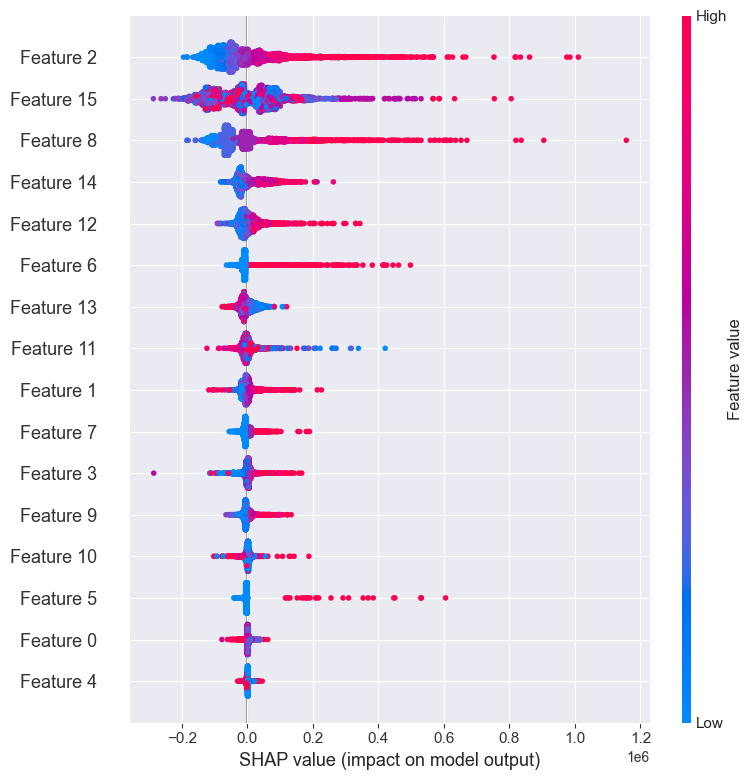

In [96]:
#XGBOOST SHAP plot.
explainer = shap.TreeExplainer(model_xgboost)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled)

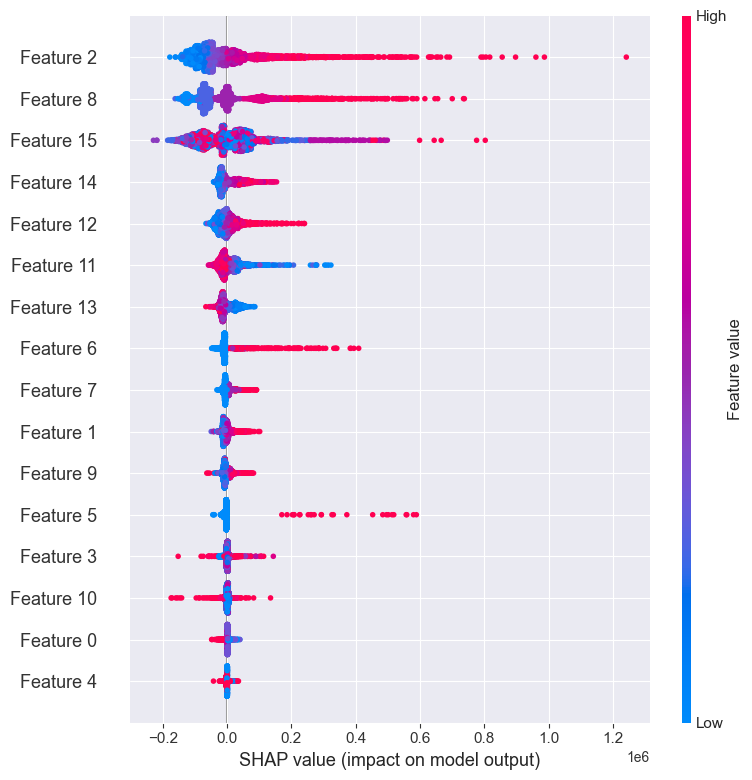

In [108]:
explainer = shap.TreeExplainer(lgb_model)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled)

In [85]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,age,neighborhood
10581,3,8,451,4129,0,0,0,2,5,251,106,88,333,2841,26,53
16051,3,5,438,2522,2,0,1,3,4,291,83,46,341,2156,68,32
20006,1,8,126,45,2,0,0,2,5,87,27,106,95,787,8,13
20698,2,7,218,1397,2,0,0,2,4,234,0,105,194,913,9,53
6699,1,2,82,1058,0,0,0,3,4,54,24,26,257,906,89,13


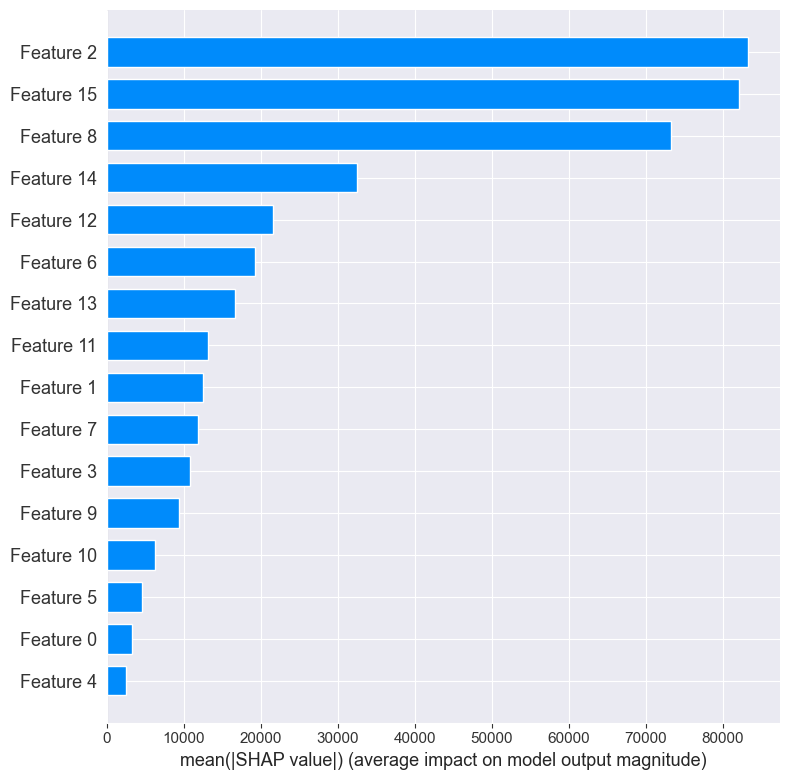

In [87]:
#The faetures can be got from the X_test columns in their respective order.
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", alpha=0.5)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

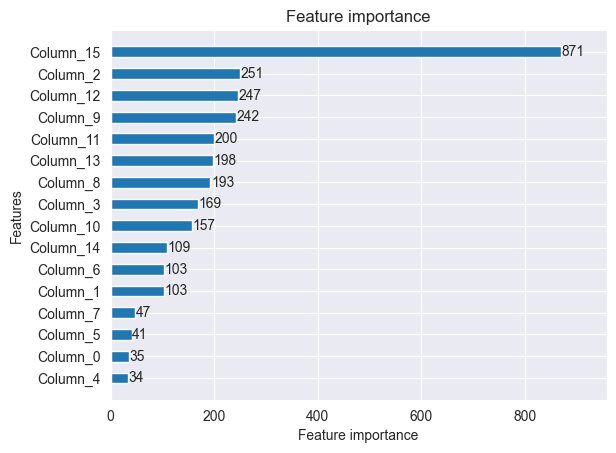

In [97]:
lgb.plot_importance(lgb_model, height=.5)

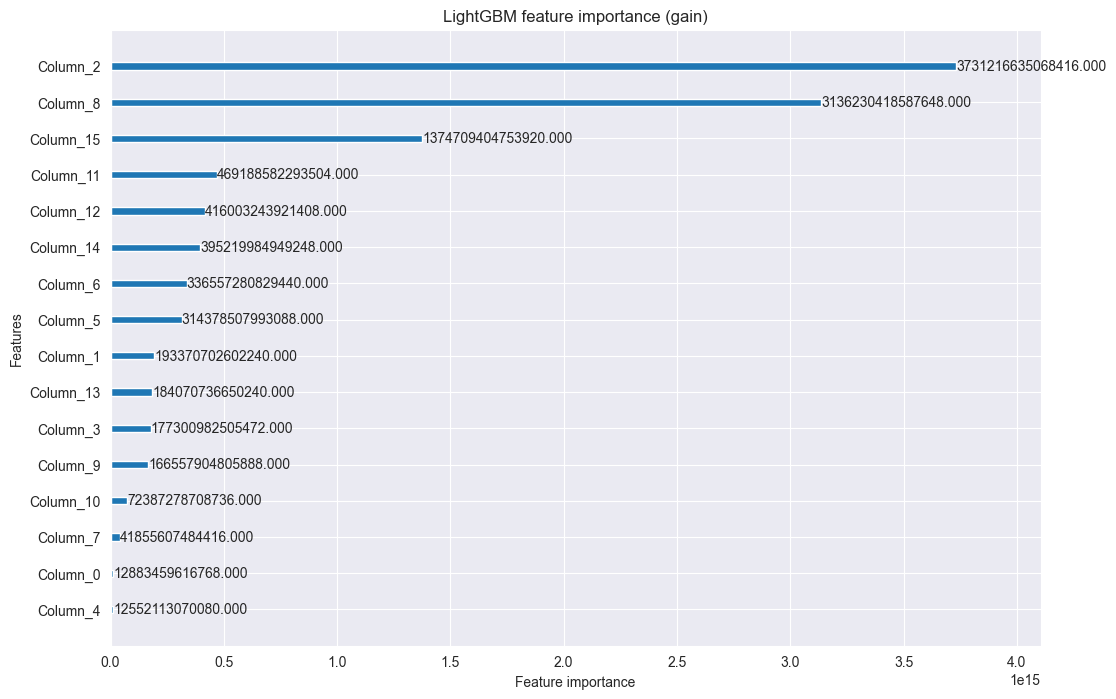

In [107]:
lgb.plot_importance(lgb_model, importance_type="gain",figsize=(12,8),title="LightGBM feature importance (gain)")
plt.show()

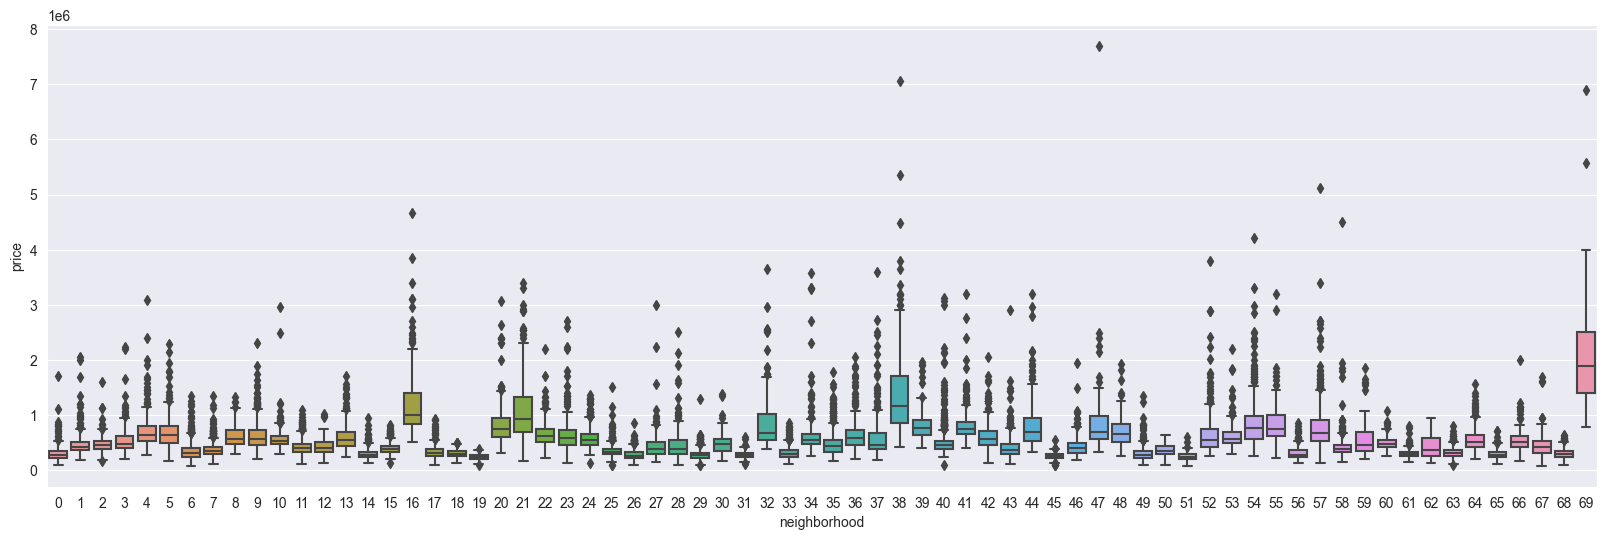

In [110]:
plt.figure(figsize=(20,6))
sns.boxplot(data=selected_df, x='neighborhood', y='price')
plt.show()

#### <ins> Conclusion </ins>

#### Objective 1
* **The house conditions.**
* **The neighbourhoods.**
* **The number of bathrooms.**
* **The age of the house.**
* **The year the house was built.**
These are the main factors that drive prices higher.

##### Objective 2 
**Improving the house gradings right from construction with better designs and also investing in high-end neighborhoods seem to be the go-to rennovation to realize a good return on investment(ROI)**


##### Objective 3
**Investing in good neighborhoods like neighbourhood 69,38 and 16 as well as improoving the housing conditions will definitely optimize the selling process of the houses**


In [72]:
# # Create a Lasso Regression model
# model = Lasso(alpha=1.0)  # You can adjust the alpha hyperparameter

# # Fit the model to the training data
# model.fit(X_train_scaled, y_train)

# # Predict the target values on the testing data
# y_pred = model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the metrics
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)


In [73]:
# # Create a Ridge Regression model
# model = Ridge(alpha=1.0)  # You can adjust the alpha hyperparameter

# # Fit the model to the training data
# model.fit(X_train_scaled, y_train)

# # Predict the target values on the testing data
# y_pred = model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the metrics
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)


In [74]:
# # Create a Bayesian Ridge Regression model
# model = BayesianRidge(n_iter=300)

# # Fit the model to the training data
# model.fit(X_train_scaled, y_train)

# # Predict the target values on the testing data
# y_pred = model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the metrics
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)


In [75]:
# # Create a KNN Regression model with 5 neighbors (you can adjust the number of neighbors)
# model = KNeighborsRegressor(n_neighbors=5)

# # Fit the model to the training data
# model.fit(X_train_scaled, y_train)

# # Predict the target values on the testing data
# y_pred = model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the metrics
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)


In [76]:
# # Create a Ridge Regression model with the default alpha=1.0
# model = Ridge(alpha=1.0)

# # Fit the model to the training data
# model.fit(X_train_scaled, y_train)

# # Predict the target values on the testing data
# y_pred = model.predict(X_test_scaled)

# # Calculate evaluation metrics for the default model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the metrics for the default model
# print("Default Model Metrics:")
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)

# # Now, let's tune the Ridge Regression model by trying different values of alpha
# alphas = [0.0001,0.001,0.01, 0.1, 1.0, 5,10.0, 100.0]  # Adjust these values as needed

# for alpha in alphas:
#     # Create a Ridge Regression model with the specified alpha
#     model = Ridge(alpha=alpha)
    
#     # Fit the model to the training data
#     model.fit(X_train_scaled, y_train)
    
#     # Predict the target values on the testing data
#     y_pred = model.predict(X_test_scaled)
    
#     # Calculate evaluation metrics for the tuned model
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     # Display the metrics for the tuned model
#     print(f"Metrics for Ridge (alpha={alpha}):")
#     print("Mean Absolute Error (MAE):", mae)
#     print("Mean Squared Error (MSE):", mse)
#     print("R-squared (R2):", r2)


In [77]:
# # Create a KNN Regression model
# knn = KNeighborsRegressor()

# # Define a range of values for n_neighbors to tune
# param_grid = {'n_neighbors': [3, 5, 7, 9, 11,17,19]}

# # Create a GridSearchCV object with cross-validation (adjust cv as needed)
# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the grid search to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# best_n_neighbors = best_params['n_neighbors']

# # Get the best model
# best_knn_model = grid_search.best_estimator_

# # Predict the target values on the testing data using the best model
# y_pred = best_knn_model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the best hyperparameters and metrics
# print("Best Number of Neighbors:", best_n_neighbors)
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)


In [78]:
# # Create a Random Forest Regression model
# rf = RandomForestRegressor(random_state=42)

# # Define a range of hyperparameters to tune
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Adjust the number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Adjust the maximum depth of the trees
#     'min_samples_split': [2, 5, 10],  # Adjust the minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4]  # Adjust the minimum samples required at each leaf node
# }

# # Create a GridSearchCV object with cross-validation (adjust cv as needed)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the grid search to the training data
# grid_search.fit(X_train_scaled, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# best_n_estimators = best_params['n_estimators']
# best_max_depth = best_params['max_depth']
# best_min_samples_split = best_params['min_samples_split']
# best_min_samples_leaf = best_params['min_samples_leaf']

# # Get the best model
# best_rf_model = grid_search.best_estimator_

# # Predict the target values on the testing data using the best model
# y_pred = best_rf_model.predict(X_test_scaled)

# # Calculate evaluation metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display the best hyperparameters and metrics
# print("Best Number of Estimators:", best_n_estimators)
# print("Best Max Depth:", best_max_depth)
# print("Best Min Samples Split:", best_min_samples_split)
# print("Best Min Samples Leaf:", best_min_samples_leaf)
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)
